In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import requests
import json

In [2]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34448,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34449,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34450,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34451,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data2 = data.loc[:,["location","date","new_cases"]]
data2

,location,date,new_cases
0,Aruba,2020-03-13,2.0
1,Aruba,2020-03-20,2.0
2,Aruba,2020-03-24,8.0
3,Aruba,2020-03-25,5.0
4,Aruba,2020-03-26,2.0
...,...,...,...
34448,International,2020-02-28,0.0
34449,International,2020-02-29,0.0
34450,International,2020-03-01,0.0
34451,International,2020-03-02,0.0


In [4]:
data2.set_index(["location"],inplace=True)

In [5]:
data2 = data2.loc[["Argentina"],:].dropna()
data2

,date,new_cases
location,,
Argentina,2020-03-04,1.0
Argentina,2020-03-06,1.0
Argentina,2020-03-07,6.0
Argentina,2020-03-08,1.0
Argentina,2020-03-09,3.0
...,...,...
Argentina,2020-07-30,5939.0
Argentina,2020-07-31,5641.0
Argentina,2020-08-01,6377.0


In [6]:
data2.reset_index(inplace=True)
data2

,location,date,new_cases
0,Argentina,2020-03-04,1.0
1,Argentina,2020-03-06,1.0
2,Argentina,2020-03-07,6.0
3,Argentina,2020-03-08,1.0
4,Argentina,2020-03-09,3.0
...,...,...,...
145,Argentina,2020-07-30,5939.0
146,Argentina,2020-07-31,5641.0
147,Argentina,2020-08-01,6377.0
148,Argentina,2020-08-02,5929.0


In [7]:
data2.set_index("date", inplace=True)
data2

,location,new_cases
date,,
2020-03-04,Argentina,1.0
2020-03-06,Argentina,1.0
2020-03-07,Argentina,6.0
2020-03-08,Argentina,1.0
2020-03-09,Argentina,3.0
...,...,...
2020-07-30,Argentina,5939.0
2020-07-31,Argentina,5641.0
2020-08-01,Argentina,6377.0


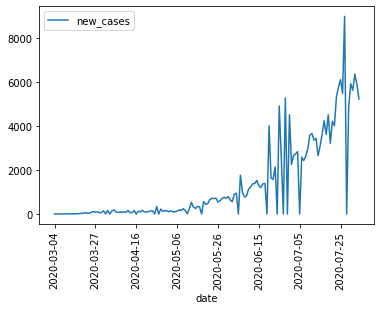

In [8]:
data2.plot(rot=90)

Text(0.5, 1.0, 'NEW CASES ARGENTINA')

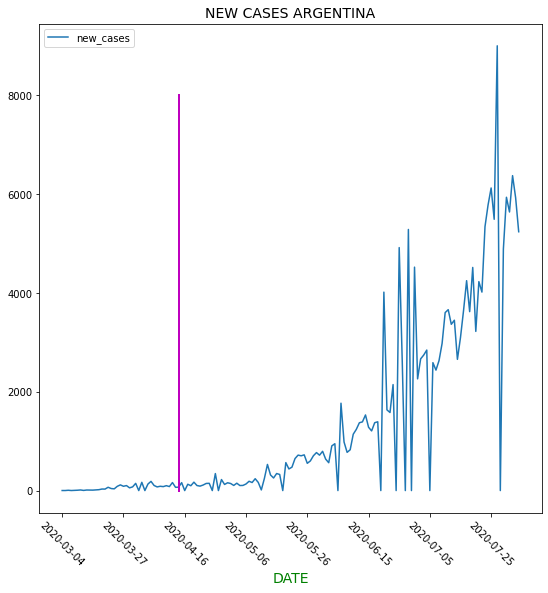

In [21]:
data2.plot(figsize=(9,9), rot=-45)
plt.xlabel("DATE", size=14, color="g")
plt.plot([38,38],[0,8000],'k-', lw=2, color="m")
plt.title("NEW CASES ARGENTINA", size=14)
